In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
data_dir = r"C:\Users\Asus\OneDrive\Desktop\Leaf_Disease_Detection\dataset"
img_size = 128

categories = os.listdir(data_dir)
print("Classes:", categories)

data = []
labels = []

for i, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            img_arr = cv2.imread(img_path)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append(img_arr)
            labels.append(i)
        except Exception as e:
            pass  # Skip unreadable images

print("Total images:", len(data))

Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
Total images: 20638


In [4]:
data = np.array(data) / 255.0  # Normalize
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (16510, 128, 128, 3)
Test data shape: (4128, 128, 128, 3)


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # helps prevent overfitting
model.add(Dense(len(categories), activation='softmax'))  # Output layer

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import os

data_dir = r'C:\Users\Asus\OneDrive\Desktop\Leaf_Disease_Detection\dataset'  # Adjust if different

# List of class folders
categories = os.listdir(data_dir)
print(f"Total Classes: {len(categories)}")
print(categories)

# Count images in each class
for category in categories:
    class_path = os.path.join(data_dir, category)
    num_images = len(os.listdir(class_path))
    print(f"{category}: {num_images} images")

Total Classes: 15
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 1000 images
Potato___healthy: 152 images
Potato___Late_blight: 1000 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_healthy: 1591 images
Tomato_Late_blight: 1909 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1404 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images


In [8]:
from sklearn.model_selection import train_test_split
import shutil
import os

# Paths
original_dataset_dir = r'C:\Users\Asus\OneDrive\Desktop\Leaf_Disease_Detection\dataset'
base_dir = r'C:\Users\Asus\OneDrive\Desktop\Leaf_Disease_Detection\split_dataset'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create new directories for train/val/test
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Split each class into train (70%), val (15%), test (15%)
for category in os.listdir(original_dataset_dir):
    files = os.listdir(os.path.join(original_dataset_dir, category))
    
    # Split files
    train_files, test_val_files = train_test_split(files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)
    
    # Create class folders in each split directory
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Copy files to their respective folders
    for f in train_files:
        shutil.copy(os.path.join(original_dataset_dir, category, f), os.path.join(train_dir, category, f))
    for f in val_files:
        shutil.copy(os.path.join(original_dataset_dir, category, f), os.path.join(val_dir, category, f))
    for f in test_files:
        shutil.copy(os.path.join(original_dataset_dir, category, f), os.path.join(test_dir, category, f))

In [9]:
def count_images(folder):
    total = 0
    for subfolder in os.listdir(folder):
        total += len(os.listdir(os.path.join(folder, subfolder)))
    return total

train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_images(test_dir)

print(f"Train images: {train_count}")
print(f"Validation images: {val_count}")
print(f"Test images: {test_count}")

Train images: 14441
Validation images: 3097
Test images: 3101


In [10]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    validation_data=(X_test, y_test),
                    batch_size=32)

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 81s 152ms/step - accuracy: 0.3426 - loss: 2.0441 - val_accuracy: 0.6882 - val_loss: 0.9704
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 73s 142ms/step - accuracy: 0.6435 - loss: 1.0910 - val_accuracy: 0.7895 - val_loss: 0.6721
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 71s 138ms/step - accuracy: 0.6984 - loss: 0.8756 - val_accuracy: 0.8200 - val_loss: 0.5786
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 72s 139ms/step - accuracy: 0.7444 - loss: 0.7472 - val_accuracy: 0.8549 - val_loss: 0.4459
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 71s 137ms/step - accuracy: 0.7788 - loss: 0.6394 - val_accuracy: 0.8559 - val_loss: 0.4182
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 72s 139ms/step - accuracy: 0.8035 - loss: 0.5692 - val_accuracy: 0.8411 - val_loss: 0.4754
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 72s 139ms/step - accuracy: 0.8203 - loss: 0.5304 - val_accuracy: 0.8937 - val_loss: 0.3124
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 73s 141ms/step - accuracy: 0.8410 - loss: 0

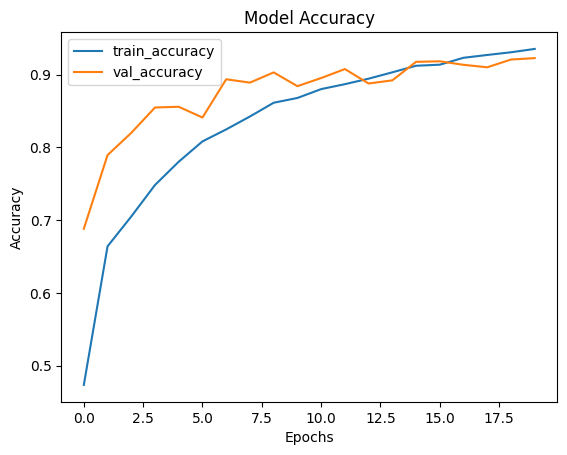

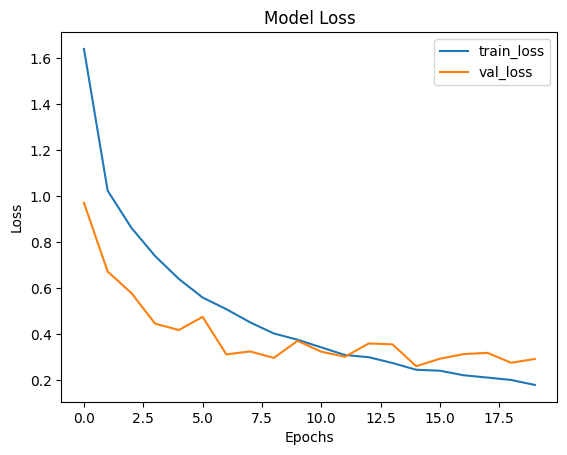

In [11]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.save('plant_disease_model.h5')

129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step
Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.88      0.93      0.90       179
                     Pepper__bell___healthy       0.92      0.99      0.95       271
                      Potato___Early_blight       0.95      0.98      0.96       216
                           Potato___healthy       0.96      0.56      0.71        39
                       Potato___Late_blight       0.92      0.83      0.87       213
                      Tomato_Bacterial_spot       0.95      0.98      0.96       423
                        Tomato_Early_blight       0.85      0.78      0.81       200
                             Tomato_healthy       0.95      0.98      0.97       327
                         Tomato_Late_blight       0.85      0.88      0.87       390
                           Tomato_Leaf_Mold       0.87      0.90      0.89       171

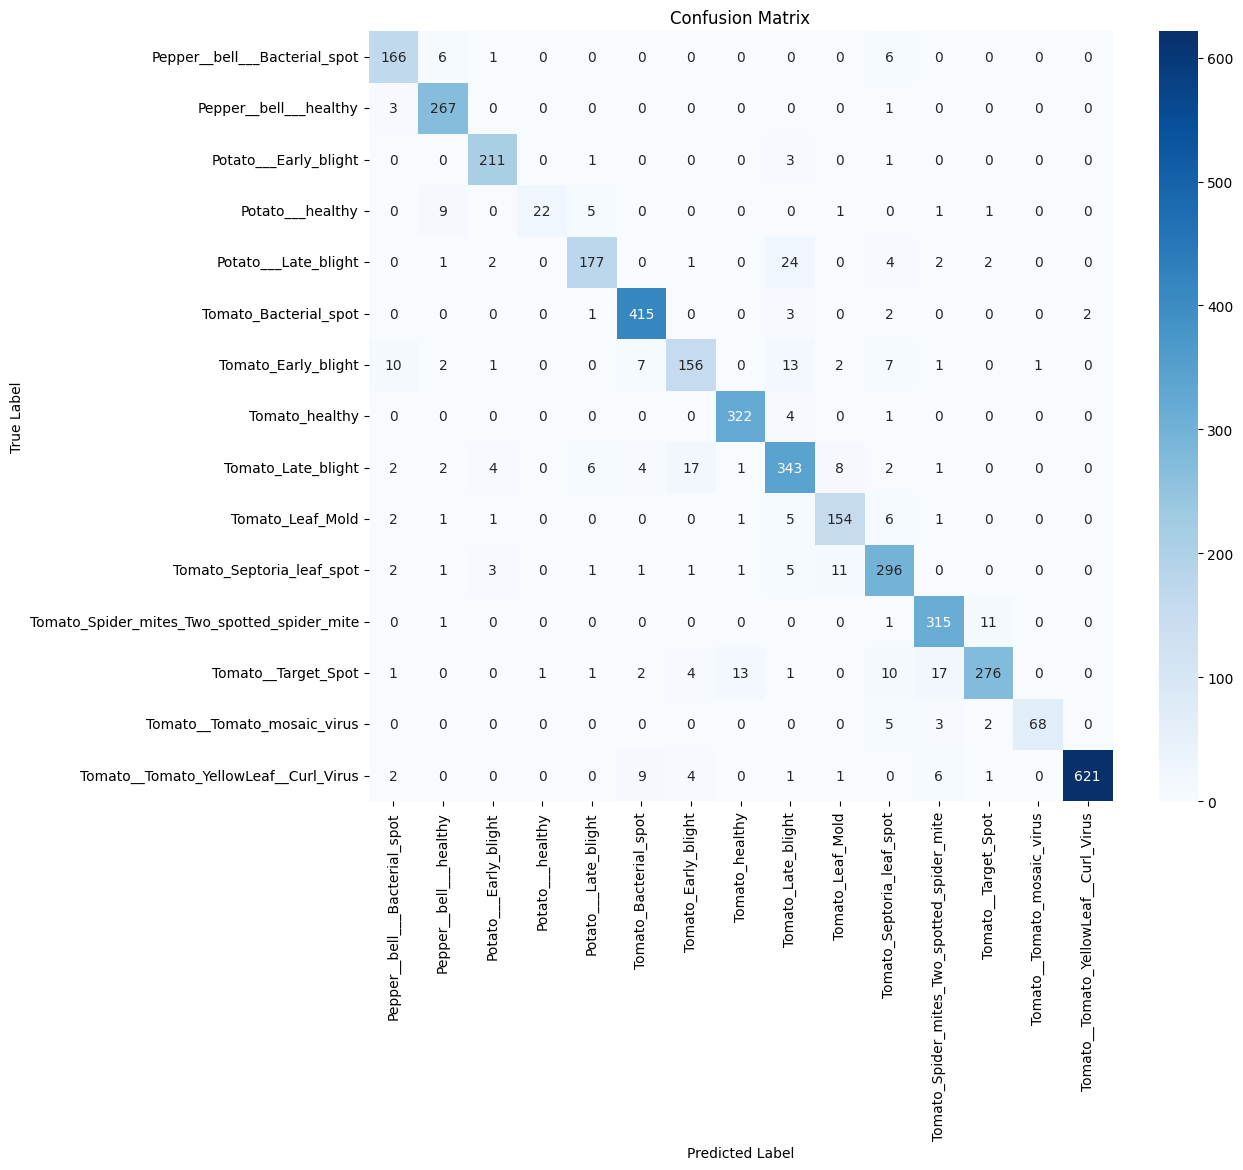

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [16]:
fertilizer_dict = {
    'Apple___Apple_scab': 'Use fungicide containing Captan or Mancozeb. Add compost to improve soil.',
    'Apple___Black_rot': 'Apply copper-based fungicide. Avoid overhead irrigation.',
    'Apple___Cedar_apple_rust': 'Use sulfur spray and maintain plant spacing.',
    'Apple___healthy': 'No disease detected. Use balanced NPK fertilizer.',

    'Blueberry___healthy': 'Use composted mulch and slow-release NPK fertilizer.',

    'Cherry_(including_sour)___Powdery_mildew': 'Apply sulfur-based fungicide and improve airflow.',
    'Cherry_(including_sour)___healthy': 'Use organic mulch and potassium-rich fertilizer.',

    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Use fungicides like azoxystrobin and improve nitrogen balance.',
    'Corn_(maize)___Common_rust_': 'Apply fungicide containing strobilurins. Avoid dense planting.',
    'Corn_(maize)___Northern_Leaf_Blight': 'Use fungicide like propiconazole. Rotate crops.',
    'Corn_(maize)___healthy': 'Use nitrogen-rich fertilizers like urea.',

    'Grape___Black_rot': 'Use fungicide with mancozeb or captan. Remove infected leaves.',
    'Grape___Esca_(Black_Measles)': 'Remove infected canes. Use balanced fertilizer.',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Apply copper fungicide and improve air flow.',
    'Grape___healthy': 'Use compost tea and low-nitrogen fertilizer.',

    'Orange___Haunglongbing_(Citrus_greening)': 'Remove infected trees. Apply micronutrient sprays.',

    'Peach___Bacterial_spot': 'Apply copper sprays before flowering. Ensure proper drainage.',
    'Peach___healthy': 'Use slow-release balanced fertilizer.',

    'Pepper__bell___Bacterial_spot': 'Use disease-free seeds and copper-based fungicide.',
    'Pepper__bell___healthy': 'Apply compost and calcium nitrate.',

    'Potato___Early_blight': 'Use a copper-based fungicide. Add compost to soil.',
    'Potato___Late_blight': 'Use fungicides like chlorothalonil. Improve drainage.',
    'Potato___healthy': 'No disease. Use potassium-rich fertilizer.',

    'Raspberry___healthy': 'Use aged compost and mulch with straw.',

    'Soybean___healthy': 'Use inoculants containing Rhizobium and apply potash.',

    'Squash___Powdery_mildew': 'Use neem oil or potassium bicarbonate spray.',

    'Strawberry___Leaf_scorch': 'Use mulch and avoid overhead watering. Apply nitrogen-rich fertilizer.',
    'Strawberry___healthy': 'Use well-rotted manure and phosphate-rich fertilizer.',

    'Tomato_Bacterial_spot': 'Use copper-based bactericides. Ensure crop rotation.',
    'Tomato_Early_blight': 'Use chlorothalonil spray. Improve air flow.',
    'Tomato_Late_blight': 'Use metalaxyl fungicide. Avoid wet foliage.',
    'Tomato_Leaf_Mold': 'Use sulfur fungicide. Improve air circulation.',
    'Tomato_Septoria_leaf_spot': 'Use fungicides like chlorothalonil or mancozeb.',
    'Tomato_Spider_mites_Two_spotted_spider_mite': 'Use miticide spray. Keep the area weed-free.',
    'Tomato__Target_Spot': 'Apply chlorothalonil fungicide. Improve air flow.',
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 'Use resistant varieties. Apply neem oil spray.',
    'Tomato__Tomato_mosaic_virus': 'Remove infected plants. Use certified seeds.',
    'Tomato_healthy': 'Use compost and balanced NPK fertilizer.'
}

In [17]:
from tensorflow.keras.preprocessing import image

def predict_disease_and_recommend(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)

    prediction = model.predict(img_arr)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_name = categories[predicted_class]

    print(f"🩺 Predicted Disease: {class_name}")
    recommendation = fertilizer_dict.get(class_name, "No fertilizer recommendation available.")
    print(f"🌿 Fertilizer Recommendation: {recommendation}")

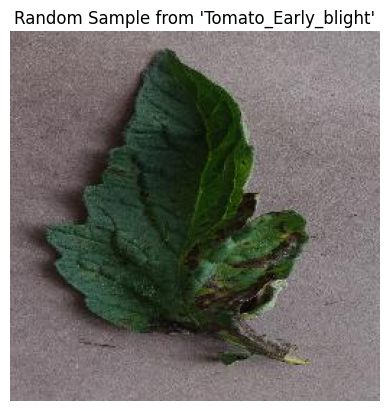

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
🩺 Predicted Disease: Tomato_Septoria_leaf_spot
🌿 Fertilizer Recommendation: Use fungicides like chlorothalonil or mancozeb.


In [18]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Correct path to actual class folders
data_dir = r'C:\Users\Asus\OneDrive\Desktop\Leaf_Disease_Detection\dataset'
categories = sorted([f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))])

# Pick a random category
random_category = random.choice(categories)

# Path to that category folder
random_folder = os.path.join(data_dir, random_category)

# Pick a random image
image_files = [f for f in os.listdir(random_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
random_image_path = os.path.join(random_folder, random_image)

# ✅ Show the image
img = image.load_img(random_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Random Sample from '{random_category}'")
plt.show()

# 🔍 Run prediction + fertilizer recommendation
predict_disease_and_recommend(random_image_path)